In this lab, we will compare the performance of several optimization algorithms on simple test problems in the STELLOPT code. 

The following optimization algorithms are implemented in the STELLOPT code
- lmdif: Levenberg Marquardt
- gade: genetic algorithm 
- pso: particle swarm 

In addition, the STELLOPT code provides additional optimization algorithms through the MANGO code (documentation: https://hiddensymmetries.github.io/mango/). The full list of available algorithms is found here (https://hiddensymmetries.github.io/mango/algorithms.html#autotoc_md5). These are specified in the STELLOPT input file using the opt_type parameter.

The following input parameters are related to the optimization algorithm and tolerance parameters. 

- xtol: Desired relative error in approximate solution. Termination occurs when the relative error between two consecutive iterates is at most XTOL. Therefore, XTOL measures the relative error desired in the approximate solution.
- gtol: Measures the orthogonality between the function vector and columns of the Jacobian. Termination occurs when the cosine of the angle between FVEC and any column of the Jacobian is at most GTOL in absolute value. Therefore, GTOL measures the orthogonality desired between the function vector and the columns of the jacobian.
- epsfcn: Jacobian forward differencing step size (1% ~ 0.0001)
- factor: Determines initial step step bound (100.0 suggested)
- opt_type: optimization algorithm (listed below)

Further STELLOPT documentation can be found at https://princetonuniversity.github.io/STELLOPT/STELLOPT.html
MANGO documentation can be found at https://hiddensymmetries.github.io/mango/

We will begin by importing various things

In [22]:
import sys
import numpy as np
sys.path.append('/Users/elizabeth/Documents/Research/mango/plotting')
from mango_plot import mangoPlot
sys.path.append('/Users/elizabeth/Documents/Research/CoilPy')
from coilpy import *
import matplotlib.pyplot as plt
sys.path.append('/Users/elizabeth/Documents/Research/simsopt')
from simsopt.modules.vmec.output import VmecOutput
from mpl_toolkits.mplot3d import Axes3D

Below we will consider several simple optimization problems. 
- 1DOF_circularCrossSection_varyAxis_targetIota
- 1DOF_circularCrossSection_varyR0_targetVolume
- 2DOF_circularCrossSection_varyAxis_targetIotaAndQuasisymmetry
- 7DOF_varyAxisAndElongation_targetIotaAndQuasisymmetry

Each has been characterized by scanning over the optimization parameters and identifying the local minima. Your task is to compare the convergence toward this minima with the available optimization algoithms and input options.

Each of these scenarios can be explored by editing the input.test file in each of these directories and submitting with the sample batch script.

The convergence can be plotted using the mango_plot and CoilPy tools, which will be demonstrated below using the examples optimized with the gsl_dogleg algorithm.

**1DOF_circularCrossSection_varyAxis_targetIota**

This is a minimal scenario. There is only 1 independent variable, and only a single term in the objective function.
The only code used is VMEC. There is no current or plasma pressure, i.e. the configuration is a vacuum field.

The 1 independent variable is the Garabedian Delta_{n=-1, m=1}, which controls the shape of the magnetic axis:
R(phi) = 1 + Delta_{n=-1, m=1} * a * cos(nfp * phi),
Z(phi) =     Delta_{n=-1, m=1} * a * sin(nfp * phi),
where a=0.01 is the minor radius. The plasma has a circular cross-section in the (R,Z) plane (so it has a slightly elliptical cross-section
in the plane perpendicular to the magnetic axis.)

The objective function is (iota - iota_target)^2, where iota is measured on the magnetic axis,
and iota_target = -0.41.

As can be seen in the figure below, the objective function is smooth.
<div>
<img src="1DOF_circularCrossSection_varyAxis_targetIota/plotObjectiveFunction.png" width="400"/>
</div>

There are two optima, at Delta = +/- 8.575. At these points, the objective function is 0. There are no other local optima.

Even though there is only 1 degree of freedom, stellopt crashes if you try to run it using Levenberg–Marquardt with only 1 proc. I also noticed that stellopt's Levenberg–Marquardt algorithm does not converge when run with only 2 procs, but it does converge when run with 4.

Plot objective function and optimization parameters.

Files that will be read and plotted:
  1DOF_circularCrossSection_varyAxis_targetIota/mango_out

Minimum objective function found: 0.01787525981644385


<Figure size 1008x489.6 with 0 Axes>

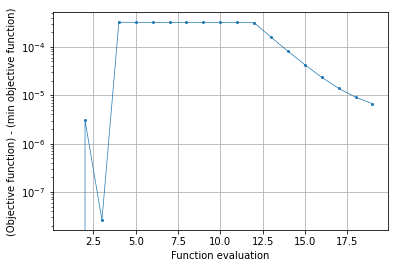

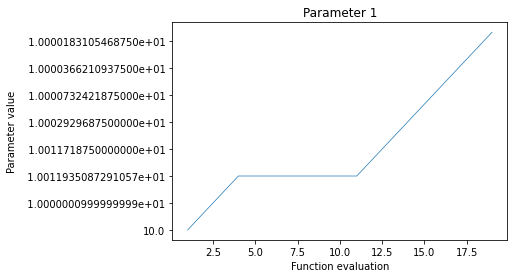

In [23]:
mangoPlot(['1DOF_circularCrossSection_varyAxis_targetIota/mango_out'])

Plot each term in the objective function.

Text(0.5, 0, 'Iteration')

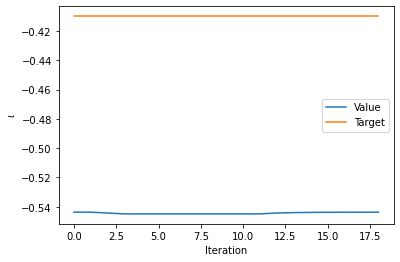

In [24]:
stellOut = STELLout('1DOF_circularCrossSection_varyAxis_targetIota/stellopt.test')
iota = stellOut['IOTA_equil']
iota_target = stellOut['IOTA_target']
stell_iter = stellOut['ITER']

plt.figure()
plt.plot(stell_iter,iota,label='Value')
plt.plot(stell_iter,iota_target,label='Target')
plt.legend()
plt.ylabel('$\iota$')
plt.xlabel('Iteration')

**1DOF_circularCrossSection_varyR0_targetVolume**
This is a minimal scenario. There is only 1 independent variable, and only a single term in the objective function.
The only code used is VMEC. There is no current or plasma pressure, i.e. the configuration is a vacuum field.

The 1 independent variable is the mean major radius, RBC(0,0).

The objective function is (V - V_target)^2, where V is the volume enclosed by the boundary, and V_target = 0.15 m^3.

Since the volume can be computed from the boundary shape analytically, there is not really a need to include VMEC or any other equilibrium code in this optimization.

As can be seen in the figure below, the objective function is smooth.
<div>
<img src="1DOF_circularCrossSection_varyR0_targetVolume/plotObjectiveFunction.png" width="400"/>
</div>

There is one optimum, at RBC(0,0) = 0.7599088773175m. At this point, the objective function is 0. There are no local optima other than this global optimum.

Even though there is only 1 degree of freedom, stellopt crashes if you try to run it using Levenberg–Marquardt with only 1 proc.

Plot objective function and optimization parameters.

Files that will be read and plotted:
  1DOF_circularCrossSection_varyR0_targetVolume/mango_out

Minimum objective function found: 9.615288755675664e-26


<Figure size 1008x489.6 with 0 Axes>

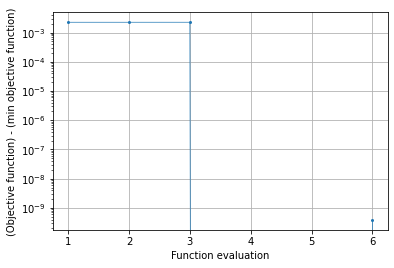

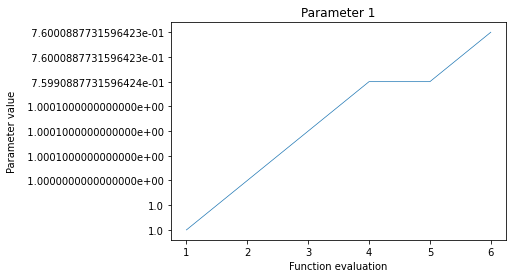

In [25]:
mangoPlot(['1DOF_circularCrossSection_varyR0_targetVolume/mango_out'])

Plot each term in the objective function.

Text(0.5, 0, 'Iteration')

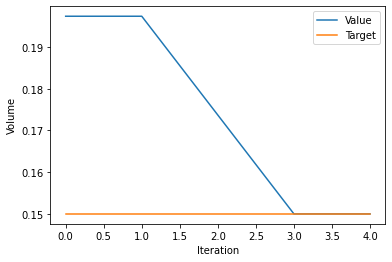

In [26]:
stellOut = STELLout('1DOF_circularCrossSection_varyR0_targetVolume/stellopt.test')
volume = stellOut['VOLUME_equil']
volume_target = stellOut['VOLUME_target']
stell_iter = stellOut['ITER']

plt.figure()
plt.plot(stell_iter,volume,label='Value')
plt.plot(stell_iter,volume_target,label='Target')
plt.legend()
plt.ylabel('Volume')
plt.xlabel('Iteration')

**2DOF_circularCrossSection_varyAxis_targetIotaAndQuasisymmetry**

This is a scenario with 2 independent variables and 2 objectives.
There is no current or plasma pressure, i.e. the configuration is a vacuum field.
There are 2 codes involved in computing the objective function: VMEC and BOOZ_XFORM.

The 2 independent variables are RBC(1,0) and ZBS(1,0), which control the shape of the magnetic axis:
R(phi) = 1 + RBC(1,0) * cos(nfp * phi),
Z(phi) =     ZBS(1,0) * sin(nfp * phi).
The plasma has a circular cross-section with radius 0.1 in the (R,Z) plane (so it has a slightly elliptical cross-section
in the plane perpendicular to the magnetic axis.)

The objective function is
f = (iota - iota_target)^2 / sigma_iota^2 + Q^2,
where
iota is the rotational transform on the magnetic axis,
iota_target = -0.41,
sigma_iota = 0.1,
and Q is a measure of the departure from quasisymmetry at the VMEC boundary surface.

As can be seen in the figure below, the objective function is fairly smooth, although there is some numerical noise apparent in the Q term when R0C(1,0) is small.
<div>
<img src="2DOF_circularCrossSection_varyAxis_targetIotaAndQuasisymmetry/plotObjectiveFunction.png" width="600"/>
</div>

The landscape of the total objective function resmbles that of the Rosenbrock function: there is a long narrow curved valley.

The optimum occurs at RBC(1,0) = 0.09223 and ZBS(1,0) = 0.09449. At this point, iota = -0.409707, Q=0.17702, and the total objective function is 0.03135.
There is a symmetric optimum at RBC(1,0) = -0.09223 and ZBS(1,0) = -0.09449. There are no other local optima.

Plot objective function and optimization parameters.

Files that will be read and plotted:
  2DOF_circularCrossSection_varyAxis_targetIotaAndQuasisymmetry/mango_out

Minimum objective function found: 0.03134633612863546


<Figure size 1008x489.6 with 0 Axes>

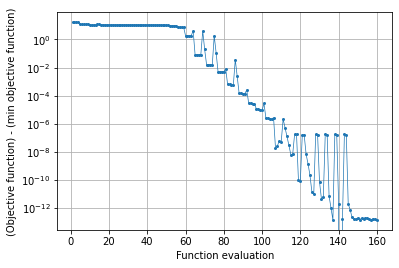

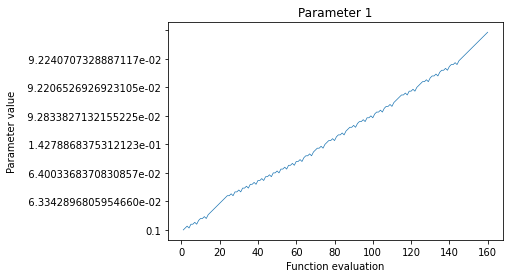

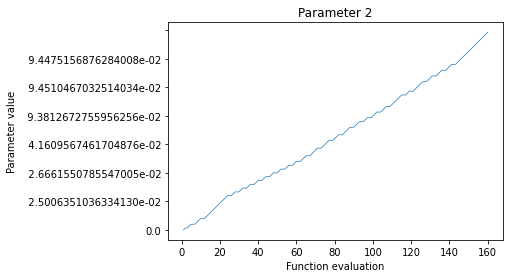

In [27]:
mangoPlot(['2DOF_circularCrossSection_varyAxis_targetIotaAndQuasisymmetry/mango_out'])

Plot each term in the objective function.

Text(0.5, 0, 'Iteration')

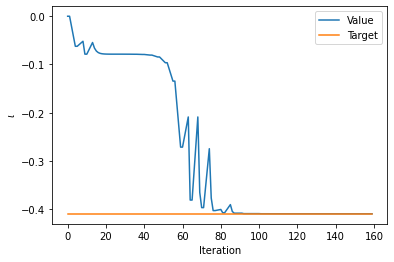

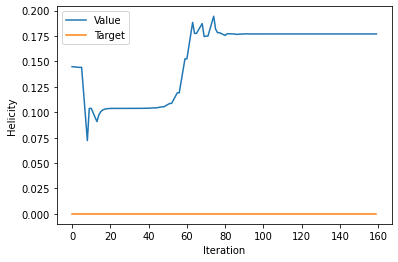

In [28]:
stellOut = STELLout('2DOF_circularCrossSection_varyAxis_targetIotaAndQuasisymmetry/stellopt.test')

iota = stellOut['IOTA_equil']
iota_target = stellOut['IOTA_target']
stell_iter = stellOut['ITER']
helicity = stellOut['HELICITY_equil']
helicity_target = stellOut['HELICITY_target']

plt.figure()
plt.plot(stell_iter,iota,label='Value')
plt.plot(stell_iter,iota_target,label='Target')
plt.legend()
plt.ylabel('$\iota$')
plt.xlabel('Iteration')

plt.figure()
plt.plot(stell_iter,helicity,label='Value')
plt.plot(stell_iter,helicity_target,label='Target')
plt.legend()
plt.ylabel('Helicity')
plt.xlabel('Iteration')

**2DOF_vmecOnly_targetIotaAndVolume**

This is a scenario with 2 independent variables and 2 objectives. There is no current or plasma pressure, i.e. the configuration is a vacuum field. There is only a single code involved in computing the objective function: VMEC. It should be straightforward to repeat this calculation using a different vacuum-field code in place of VMEC.

The 2 independent variables are RBC(1,1) and ZBS(1,1), which control the shape of the plasma boundary:
R(phi) = 1 + 0.1 * cos(theta) + RBC(1,1) * cos(theta - 5 * phi),
Z(phi) =     0.1 * sin(theta) + ZBS(1,1) * sin(theta - 5 * phi).

The objective function is
f = (iota - iota_target)^2 + (volume - volume_target)^2,
where iota is the rotational transform on the magnetic axis, iota_target = 0.41, volume_target = 0.15 m^3, and volume is the volume enclosed by the plasma boundary.

As can be seen in the figure below, the objective function is smooth. 
<div>
<img src="2DOF_vmecOnly_targetIotaAndVolume/plotObjectiveFunction.png" width="600"/>
</div>

The landscape of the total objective function has two long narrow valleys that are fairly straight. When either of the two input parameters is +/- 0.1m, the boundary surface becomes infinitesmally thin, so VMEC is sure to fail. In practice VMEC begins to struggle when RBC(1,1) or ZBS(1,1) approaches 0.08m, so it is convenient to include bound constraints to stay away from these physical barriers in parameter space.

The optimum occurs at RBC(1,1) = 0.0313066948 m and ZBS(1,1) = -0.031232391 m. At this point, iota(0) = 0.4114567, volume=0.178091, and the total objective function is 7.912501330E-04. There is a symmetric optimum at RBC(1,0) = -0.0313066948 m and ZBS(1,1) = 0.031232391 m. There are no other local optima within the non-pathological region bounded by +/- 0.1m.

**7DOF_varyAxisAndElongation_targetIotaAndQuasisymmetry**

This is a scenario with 7 independent variables, targeting both iota
and quasisymmetry.  There is no current or plasma pressure, i.e. the
configuration is a vacuum field.  There are 2 codes involved in
computing the objective function: VMEC and BOOZ_XFORM.

The independent variables represent the shape of the magnetic axis,
and the toroidal variation of the minor radius, elongation, and
rotation angle of the elliptical surfaces. The average major radius is
fixed at 1, and the average minor radius is fixed at 0.1.

More precisely, the independent variables are the Garabedian
coefficients Delta_{n,m} for the following values of (n,m):

(-1,1) and (1,1)  [Shape of the magnetic axis]
(0,2)             [Toroidally averaged elongation]
(-1,0) and (1,0)  [Toroidally varying minor radius]
(-1,2) and (1,2)  [Toroidally varying elongation]

The Garabedian Delta for (n,m)=(0,1) [Major radius / minor radius] is
fixed at 10, and the (n,m)=(0,0) coefficient [average minor radius] is
fixed at 1.

The objective function is
f = (iota - iota_target)^2 / sigma_iota^2 + Q^2,
where iota is the rotational transform on the magnetic axis,
iota_target = -0.41, sigma_iota = 0.1, and Q is a measure of the departure from quasisymmetry at the VMEC
boundary surface. The definition of Q in this example is different from the one in the 2DOF_circularCrossSection_varyAxis_targetIotaAndQuasisymmetry example. Here, stellopt considers Q to be the sum of 1040 quadratic terms (one for each non-symmetric Fourier mode of |B| at the given Fourier resolution), so the number of terms is larger than the number of degrees of freedom (as needed by Levenberg-Mardquardt).

Stellopt seems to struggle with this example, in the following way. The 'Levenberg-Marquardt_coldStart' subdirectory shows that when stellopt is initialized with a particular initial condition far from any optimum, by the 1719th function evaluation, it ends up at a point where the objective function is f=1.7613E-03; the next ~8000 function evaluations produce no improvement. However, when stellopt is restarted from the endpoint of the first optimization, it reduces f to 1.5191E-03 already on the 15th function evaluation, and f is further reduced to 1.0102E-03. Restarting again, f is further reduced. I don't know if the issue is local minima, or perhaps resetting the Levenberg parameter produces a better linesearch direction for some reason.

The best optimum I have found so far is as follows:

f = 1.0086E-03

  RBC( 000,000) =    1.000000000000E+000    ZBS( 000,000) =    0.000000000000E+000
  RBC( 001,000) =   -9.380368462076E-003    ZBS( 001,000) =   -9.602636989978E-003
  RBC(-001,001) =    3.242425068324E-002    ZBS(-001,001) =   -2.976176077559E-002
  RBC( 000,001) =    9.943959510140E-002    ZBS( 000,001) =    1.005604048985E-001
  RBC( 001,001) =   -1.569371836431E-003    ZBS( 001,001) =   -1.427580686980E-003

The corresponding Garabedian coefficients are:
           n           m      Delta_{n,m}
------------------------------------------------
          -1           0 -1.498476261706249E-002
           0           0   1.00000000000000     
           1           0  1.331244953825667E-002
          -1           1 -9.491502726031747E-002
           0           1   10.0000000000050     
           1           1  1.111342639510550E-003
          -1           2  0.310930057294306     
           0           2 -5.604048985502819E-003
           1           2 -7.089557472553538E-004

Note that the order of elements in the x vector is
x(1) = DELTA(-001, 000) (n is before m)
x(2) = DELTA(-001, 001)
x(3) = DELTA(-001, 002)
x(4) = DELTA( 000, 002)
x(5) = DELTA( 001, 000)
x(6) = DELTA( 001, 001)
x(7) = DELTA( 001, 002)
(This can be seen from the var_labels file generated by stellopt.)

Plot each term in the objective function.

Files that will be read and plotted:
  7DOF_varyAxisAndElongation_targetIotaAndQuasisymmetry/mango_out

Minimum objective function found: 0.06354183571756884


<Figure size 1008x489.6 with 0 Axes>

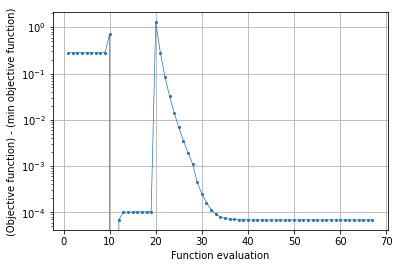

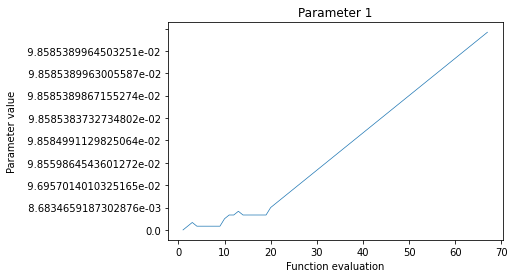

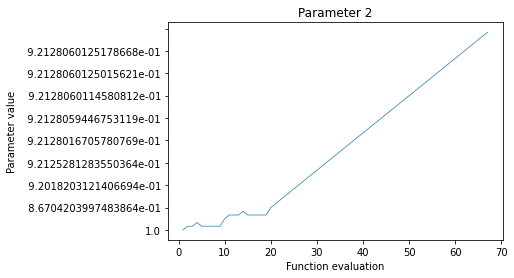

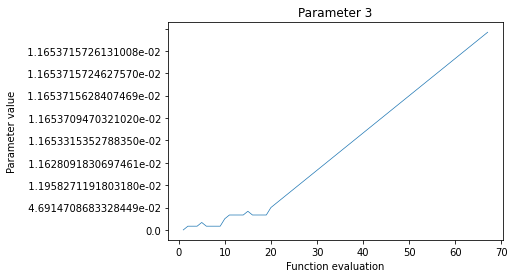

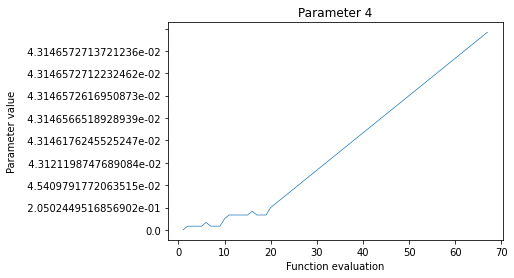

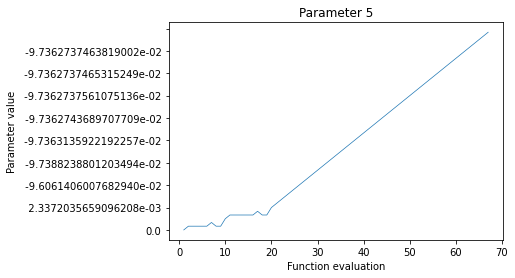

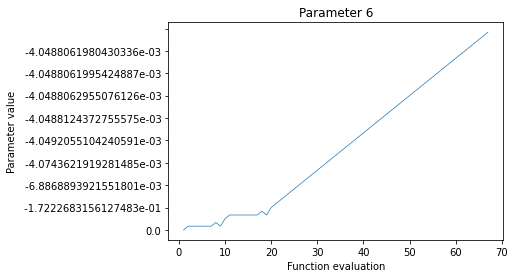

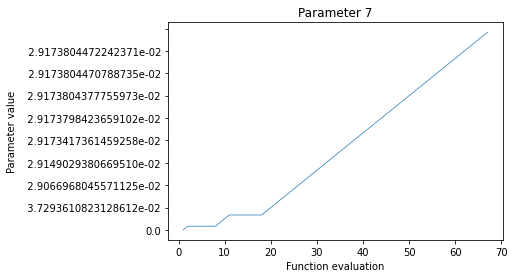

In [29]:
mangoPlot(['7DOF_varyAxisAndElongation_targetIotaAndQuasisymmetry/mango_out'])

Plot each term in the objective function.

Text(0.5, 0, 'Iteration')

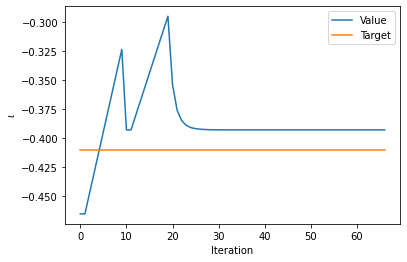

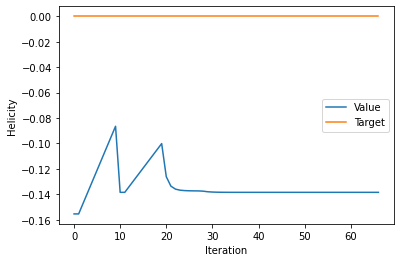

In [30]:
stellOut = STELLout('7DOF_varyAxisAndElongation_targetIotaAndQuasisymmetry/stellopt.test')
iota = stellOut['IOTA_equil']
iota_target = stellOut['IOTA_target']
stell_iter = stellOut['ITER']
helicity = np.sum(stellOut['HELICITY_FULL_equil'],1)
helicity_target = np.sum(stellOut['HELICITY_FULL_target'],1)

plt.figure()
plt.plot(stell_iter,iota,label='Value')
plt.plot(stell_iter,iota_target,label='Target')
plt.legend()
plt.ylabel('$\iota$')
plt.xlabel('Iteration')

plt.figure()
plt.plot(stell_iter,helicity,label='Value')
plt.plot(stell_iter,helicity_target,label='Target')
plt.legend()
plt.ylabel('Helicity')
plt.xlabel('Iteration')

Plot initial and final surfaces

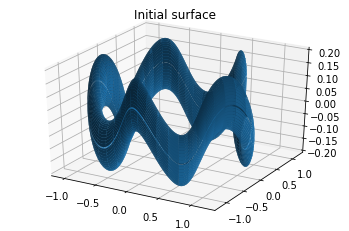

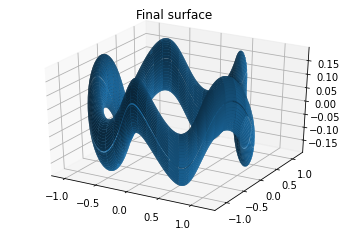

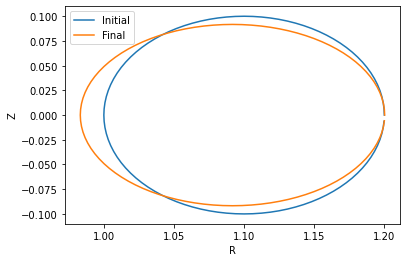

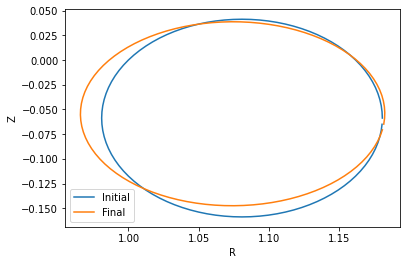

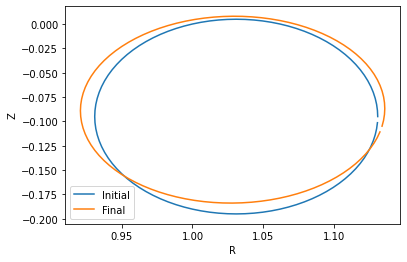

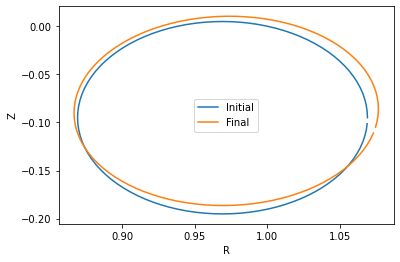

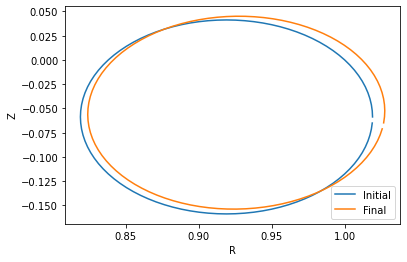

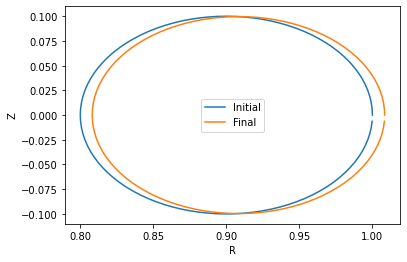

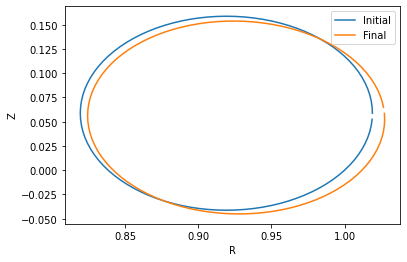

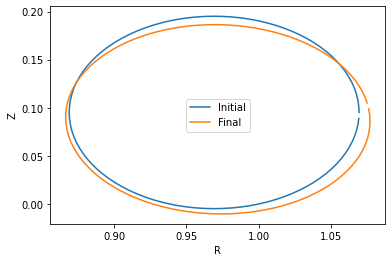

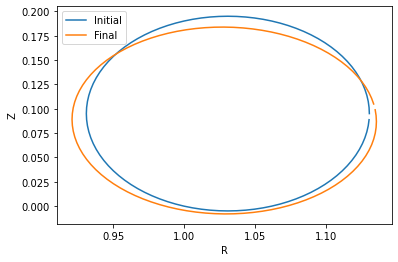

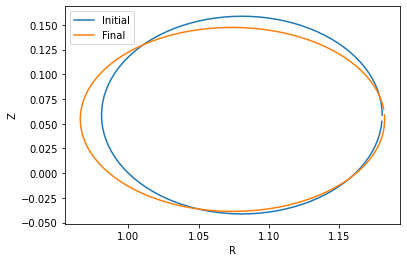

In [31]:
%matplotlib inline

InitObject = VmecOutput('7DOF_varyAxisAndElongation_targetIotaAndQuasisymmetry/wout_test.00000.nc')
FinalObject = VmecOutput('7DOF_varyAxisAndElongation_targetIotaAndQuasisymmetry/wout_test.00066.nc')

[X_init,Y_init,Z_init,R_init] = InitObject.compute_position(theta=InitObject.thetas_2d_full,zeta=InitObject.zetas_2d_full)
[X_final,Y_final,Z_final,R_final] = FinalObject.compute_position(theta=InitObject.thetas_2d_full,zeta=InitObject.zetas_2d_full)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_init,Y_init,Z_init)
plt.title('Initial surface')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_final,Y_final,Z_final)
plt.title('Final surface')

for iphi in range(0,InitObject.nzeta,10):
    plt.figure()
    plt.plot(R_init[iphi,:],Z_init[iphi,:],label='Initial')
    plt.plot(R_final[iphi,:],Z_final[iphi,:],label='Final')
    plt.xlabel('R')
    plt.ylabel('Z')
    plt.legend()